tgb - 7/3/2019 - Trying to analyze September 28/29 2016 case 

In [65]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import datetime
from skimage import measure

In [66]:
path = '/nfs/twcroninlab002/tbeucler/ERA5/ERA5_LHF_SHF/2016/'

In [67]:
PW2016 = xr.open_mfdataset(path+'??PW.nc')

/home/tbeucler/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/home/tbeucler/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


In [68]:
PW2016.time.shape[0]

8784

In [69]:
PWmean = PW2016.tcwv.sel({'time':'2016-09'}).mean(dim='time').values
print(PWmean.shape)
print(PW2016.tcwv.shape)

(721, 1440)
(8784, 721, 1440)


In [70]:
PW2016.time.shape[0]

8784

In [71]:
PWmean.shape

(721, 1440)

In [72]:
# PWm = np.moveaxis(np.repeat(PWmean[:,:,np.newaxis],PW2016.time.sel({'time':'2016-09'}).shape[0],axis=2),2,0)
# print(PWm.shape)

In [73]:
PWa = PW2016.tcwv.sel({'time':slice('2016-09-28','2016-09-30')})-\
np.moveaxis(np.repeat(PWmean[:,:,np.newaxis],PW2016.time.sel({'time':slice('2016-09-28','2016-09-30')}).shape[0],axis=2),2,0)

# 1) Visualization of transient and total fields over Sep28-Sep29

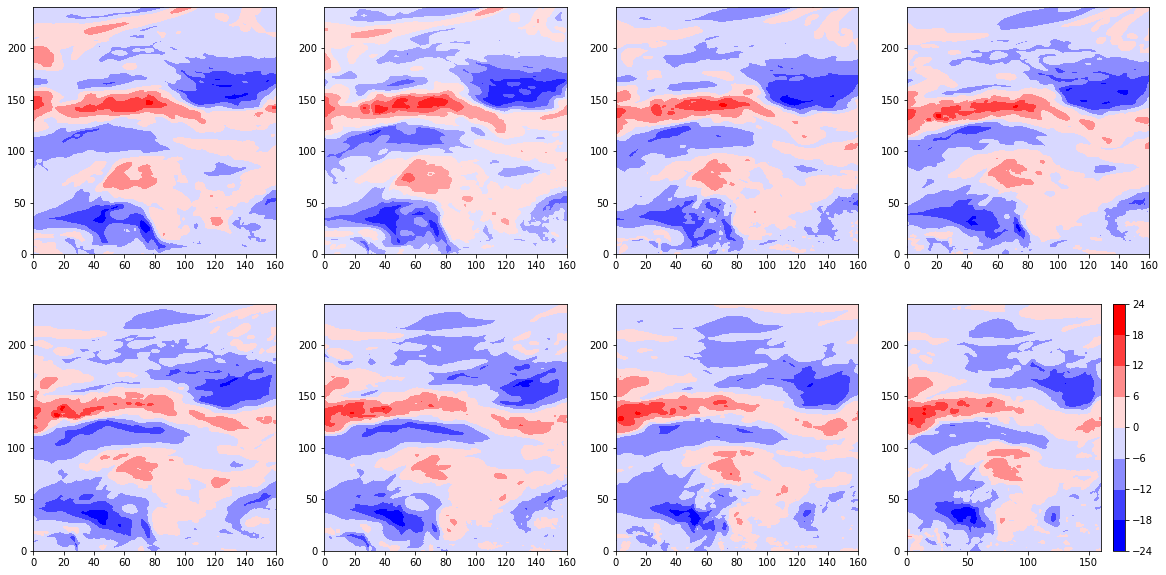

In [74]:
vmin = -20
vmax = 20

plt.figure(figsize=(20,10))

plt.subplot(2,4,1)
plt.contourf(PWa.sel({'time':'2016-09-28T00:00:00',\
                      'latitude':slice(30,-30),'longitude':slice(60,100)}),cmap='bwr',vmin=vmin,vmax=vmax)
plt.subplot(2,4,2)
plt.contourf(PWa.sel({'time':'2016-09-28T06:00:00',\
                                   'latitude':slice(30,-30),'longitude':slice(60,100)}),cmap='bwr',vmin=vmin,vmax=vmax)
plt.subplot(2,4,3)
plt.contourf(PWa.sel({'time':'2016-09-28T12:00:00',\
                                   'latitude':slice(30,-30),'longitude':slice(60,100)}),cmap='bwr',vmin=vmin,vmax=vmax)
plt.subplot(2,4,4)
plt.contourf(PWa.sel({'time':'2016-09-28T18:00:00',\
                                   'latitude':slice(30,-30),'longitude':slice(60,100)}),cmap='bwr',vmin=vmin,vmax=vmax)
plt.subplot(2,4,5)
plt.contourf(PWa.sel({'time':'2016-09-29T00:00:00',\
                                   'latitude':slice(30,-30),'longitude':slice(60,100)}),cmap='bwr',vmin=vmin,vmax=vmax)
plt.subplot(2,4,6)
plt.contourf(PWa.sel({'time':'2016-09-29T06:00:00',\
                                   'latitude':slice(30,-30),'longitude':slice(60,100)}),cmap='bwr',vmin=vmin,vmax=vmax)
plt.subplot(2,4,7)
plt.contourf(PWa.sel({'time':'2016-09-29T12:00:00',\
                                   'latitude':slice(30,-30),'longitude':slice(60,100)}),cmap='bwr',vmin=vmin,vmax=vmax)
plt.subplot(2,4,8)
plt.contourf(PWa.sel({'time':'2016-09-29T18:00:00',\
                                   'latitude':slice(30,-30),'longitude':slice(60,100)}),cmap='bwr',vmin=vmin,vmax=vmax)
plt.colorbar()

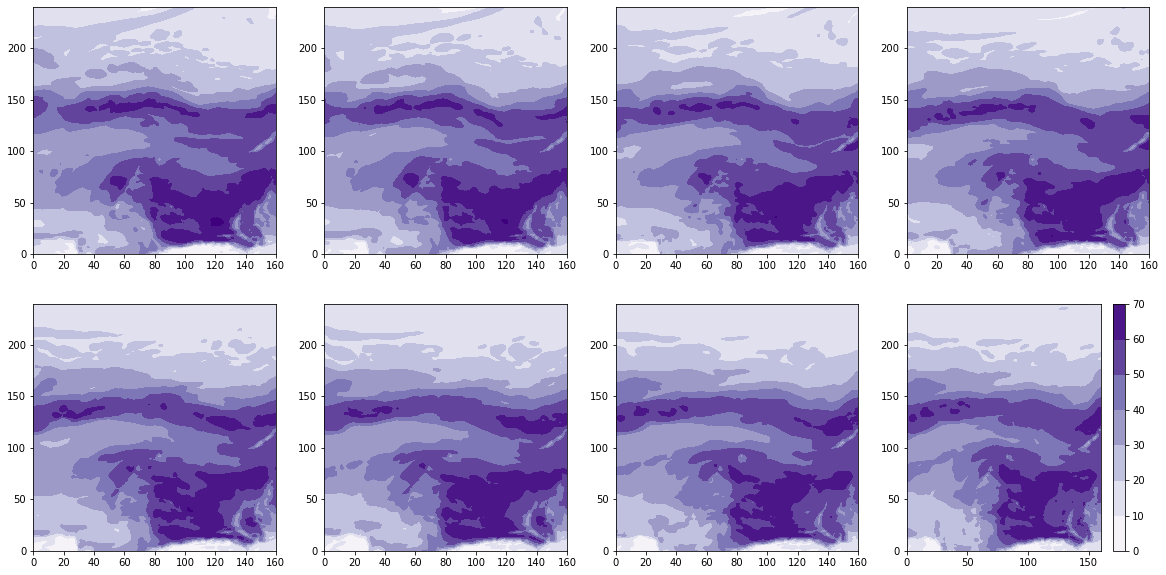

In [75]:
vmin = 0
vmax = 70

PWtot = PW2016.tcwv.sel({'time':slice('2016-09-28','2016-09-30')})

plt.figure(figsize=(20,10))

plt.subplot(2,4,1)
plt.contourf(PWtot.sel({'time':'2016-09-28T00:00:00',\
                      'latitude':slice(30,-30),'longitude':slice(60,100)}),cmap='Purples',vmin=vmin,vmax=vmax)
plt.subplot(2,4,2)
plt.contourf(PWtot.sel({'time':'2016-09-28T06:00:00',\
                                   'latitude':slice(30,-30),'longitude':slice(60,100)}),cmap='Purples',vmin=vmin,vmax=vmax)
plt.subplot(2,4,3)
plt.contourf(PWtot.sel({'time':'2016-09-28T12:00:00',\
                                   'latitude':slice(30,-30),'longitude':slice(60,100)}),cmap='Purples',vmin=vmin,vmax=vmax)
plt.subplot(2,4,4)
plt.contourf(PWtot.sel({'time':'2016-09-28T18:00:00',\
                                   'latitude':slice(30,-30),'longitude':slice(60,100)}),cmap='Purples',vmin=vmin,vmax=vmax)
plt.subplot(2,4,5)
plt.contourf(PWtot.sel({'time':'2016-09-29T00:00:00',\
                                   'latitude':slice(30,-30),'longitude':slice(60,100)}),cmap='Purples',vmin=vmin,vmax=vmax)
plt.subplot(2,4,6)
plt.contourf(PWtot.sel({'time':'2016-09-29T06:00:00',\
                                   'latitude':slice(30,-30),'longitude':slice(60,100)}),cmap='Purples',vmin=vmin,vmax=vmax)
plt.subplot(2,4,7)
plt.contourf(PWtot.sel({'time':'2016-09-29T12:00:00',\
                                   'latitude':slice(30,-30),'longitude':slice(60,100)}),cmap='Purples',vmin=vmin,vmax=vmax)
plt.subplot(2,4,8)
plt.contourf(PWtot.sel({'time':'2016-09-29T18:00:00',\
                                   'latitude':slice(30,-30),'longitude':slice(60,100)}),cmap='Purples',vmin=vmin,vmax=vmax)
plt.colorbar()

# 2) Same visualization with binary masks on

## 2.1) Find separation values for PDF

In [76]:
def find_separation_bin(field,vmin=45,vmax=55,bins=100):
# Inputs
# field = field from which to take the pdf
# vmin = minimal value of the interval over which min(PDF) will be searched
# vmax = maximal value //
# bins = Number of bins of the PDF

    field_hist,bin_edges = np.histogram(field.flatten(),bins=bins)
    bin_mid = 0.5*(bin_edges[:-1]+bin_edges[1:])

    binary = (bin_mid<vmax)*(bin_mid>vmin)
    imin =  np.argmin(field_hist[binary])+np.argmax(binary)

    return bin_mid[imin],bin_mid

In [77]:
PW_ano = PWa.sel({'time':'2016-09-28T00:00:00',\
                  'latitude':slice(30,-30),'longitude':slice(60,100)}).values

Text(0, 0.5, 'Number of samples')

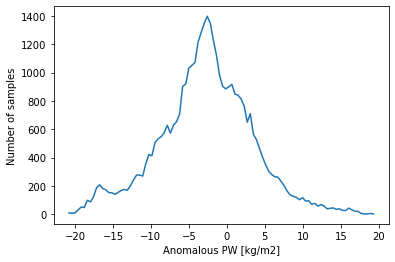

In [78]:
field_hist,bin_edges = np.histogram(PW_ano.flatten(),bins=100)
bin_mid = 0.5*(bin_edges[:-1]+bin_edges[1:])
plt.plot(bin_mid,field_hist)
plt.xlabel('Anomalous PW [kg/m2]')
plt.ylabel('Number of samples')

In [79]:
bin_max,bin_mid = find_max_bin(PW_ano.flatten())
print(bin_max)

-2.5804753


In [80]:
PWtot_values = PW2016.tcwv.sel({'time':slice('2016-09-28','2016-09-30'),\
                  'latitude':slice(30,-30),'longitude':slice(60,100)}).values

Text(0, 0.5, 'Number of samples')

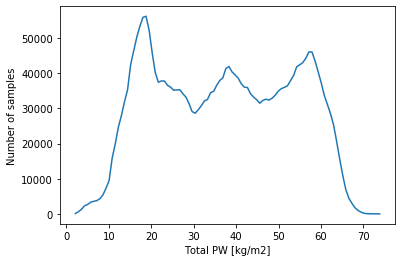

In [81]:
field_hist,bin_edges = np.histogram(PWtot_values.flatten(),bins=100)
bin_mid = 0.5*(bin_edges[:-1]+bin_edges[1:])
plt.plot(bin_mid,field_hist)
plt.xlabel('Total PW [kg/m2]')
plt.ylabel('Number of samples')

In [83]:
bin_min,bin_mid = find_separation_bin(PWtot_values.flatten())
print(bin_min)

45.579243


In [84]:
def find_max_bin(field,vmin=-20,vmax=20,bins=100):
# Inputs
# field = field from which to take the pdf
# vmin = minimal value of the interval over which min(PDF) will be searched
# vmax = maximal value //
# bins = Number of bins of the PDF

    field_hist,bin_edges = np.histogram(field.flatten(),bins=bins)
    bin_mid = 0.5*(bin_edges[:-1]+bin_edges[1:])

    binary = (bin_mid<vmax)*(bin_mid>vmin)
    imax =  np.argmax(field_hist[binary])+np.argmax(binary)

    return bin_mid[imax],bin_mid

## 2.2) Create binary mask

In [93]:
binary_tot[0,0,0].values

array(True)

In [96]:
PWtot*binary_tot.values

<xarray.DataArray 'tcwv' (time: 72, latitude: 721, longitude: 1440)>
dask.array<shape=(72, 721, 1440), dtype=float32, chunksize=(72, 721, 1440)>
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2016-09-28 ... 2016-09-30T23:00:00

In [123]:
# Average grid box area
Nx = PW2016.longitude.size
Ny = PW2016.latitude.size
A_earth = 510.1e6; # In km2
A_grid_avg = A_earth/(Nx*Ny)
dx_avg = np.sqrt(A_grid_avg)

In [126]:
PW_bin

<xarray.DataArray 'tcwv' (time: 72, latitude: 721, longitude: 1440)>
dask.array<shape=(72, 721, 1440), dtype=int64, chunksize=(72, 721, 1440)>
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2016-09-28 ... 2016-09-30T23:00:00

i= 0  and tstr= 2016-09-28T00:00:00
WMI= 0.2714556131931792
i= 1  and tstr= 2016-09-28T06:00:00
WMI= 0.29555191399550074
i= 2  and tstr= 2016-09-28T12:00:00
WMI= 0.3065003434905509
i= 3  and tstr= 2016-09-28T18:00:00
WMI= 0.2579523804447651
i= 4  and tstr= 2016-09-29T00:00:00
WMI= 0.2572136788014114
i= 5  and tstr= 2016-09-29T06:00:00
WMI= 0.282683857589032
i= 6  and tstr= 2016-09-29T12:00:00
WMI= 0.2809417033309169
i= 7  and tstr= 2016-09-29T18:00:00
WMI= 0.26890557087834427


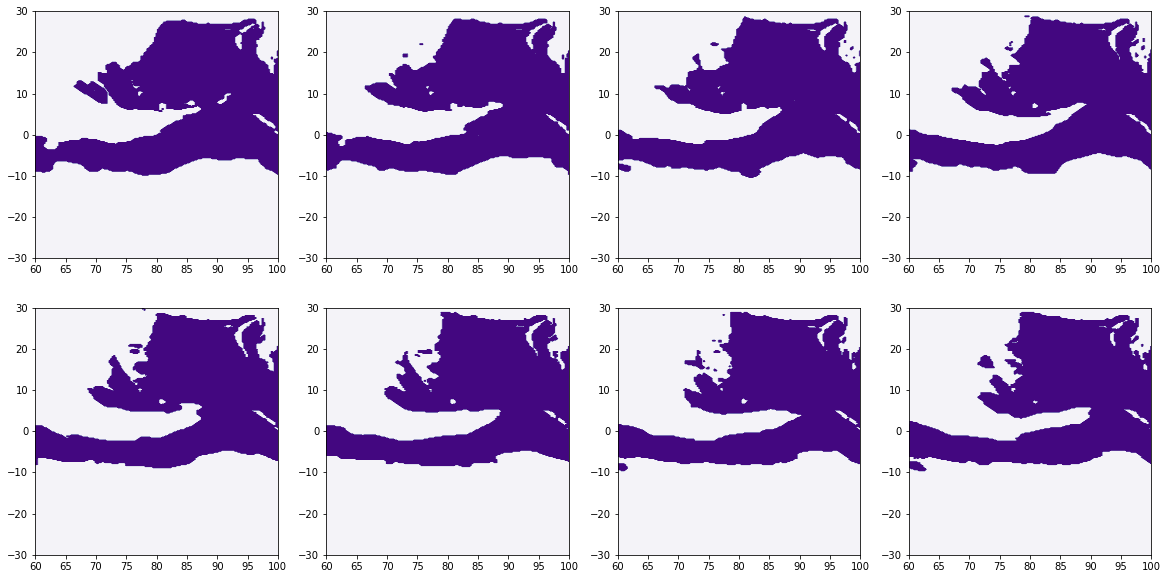

In [140]:
time_string = ['2016-09-28T00:00:00','2016-09-28T06:00:00','2016-09-28T12:00:00','2016-09-28T18:00:00',\
              '2016-09-29T00:00:00','2016-09-29T06:00:00','2016-09-29T12:00:00','2016-09-29T18:00:00']
dx = dx_avg
vmin = 0
vmax = 1

PW_bin = (1*(PWtot>bin_min))

plt.figure(figsize=(20,10))

for i,tstr in enumerate(time_string):
    print('i=',i,' and tstr=',tstr)
    TOPLOT = PW_bin.sel({'time':tstr,\
                         'latitude':slice(30,-30),\
                         'longitude':slice(60,100)})
    plt.subplot(2,4,i+1)
    plt.contourf(PW2016.longitude.sel({'longitude':slice(60,100)}),\
                 PW2016.latitude.sel({'latitude':slice(30,-30)}),\
                 TOPLOT,cmap='Purples',vmin=vmin,vmax=vmax)
    A_tot = np.sum(TOPLOT,axis=(0,1))*(dx**2)/1e12
    perimeter_tot = dx*(measure.perimeter(TOPLOT,8)-\
                        measure.perimeter(TOPLOT[:,1:-2])/2)/1e6
    WMI = 4*np.pi*A_tot/perimeter_tot**2
    print('WMI=',WMI.values)

In [139]:
print('WMI=',WMI.values)

WMI= 0.2714556131931792


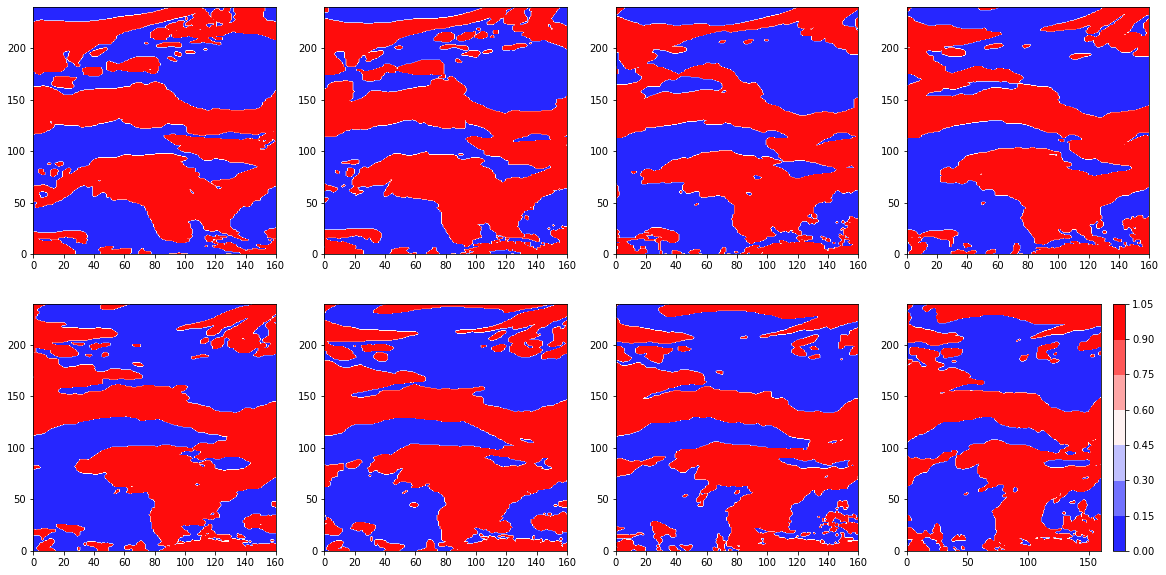

In [114]:
vmin = 0
vmax = 1

PW_bin = (1*(PWa>bin_max))

plt.figure(figsize=(20,10))

plt.subplot(2,4,1)
plt.contourf(PW_bin.sel({'time':'2016-09-28T00:00:00',\
                      'latitude':slice(30,-30),'longitude':slice(60,100)}),cmap='bwr',vmin=vmin,vmax=vmax)
plt.subplot(2,4,2)
plt.contourf(PW_bin.sel({'time':'2016-09-28T06:00:00',\
                                   'latitude':slice(30,-30),'longitude':slice(60,100)}),cmap='bwr',vmin=vmin,vmax=vmax)
plt.subplot(2,4,3)
plt.contourf(PW_bin.sel({'time':'2016-09-28T12:00:00',\
                                   'latitude':slice(30,-30),'longitude':slice(60,100)}),cmap='bwr',vmin=vmin,vmax=vmax)
plt.subplot(2,4,4)
plt.contourf(PW_bin.sel({'time':'2016-09-28T18:00:00',\
                                   'latitude':slice(30,-30),'longitude':slice(60,100)}),cmap='bwr',vmin=vmin,vmax=vmax)
plt.subplot(2,4,5)
plt.contourf(PW_bin.sel({'time':'2016-09-29T00:00:00',\
                                   'latitude':slice(30,-30),'longitude':slice(60,100)}),cmap='bwr',vmin=vmin,vmax=vmax)
plt.subplot(2,4,6)
plt.contourf(PW_bin.sel({'time':'2016-09-29T06:00:00',\
                                   'latitude':slice(30,-30),'longitude':slice(60,100)}),cmap='bwr',vmin=vmin,vmax=vmax)
plt.subplot(2,4,7)
plt.contourf(PW_bin.sel({'time':'2016-09-29T12:00:00',\
                                   'latitude':slice(30,-30),'longitude':slice(60,100)}),cmap='bwr',vmin=vmin,vmax=vmax)
plt.subplot(2,4,8)
plt.contourf(PW_bin.sel({'time':'2016-09-29T18:00:00',\
                                   'latitude':slice(30,-30),'longitude':slice(60,100)}),cmap='bwr',vmin=vmin,vmax=vmax)
plt.colorbar()

In [87]:
def calc_WMI(CRH,dx,CRH_sep=None, slices=1):
    ### Input: precipitable water field (time, x, y)
    ### dx = Average grid spacing
    ### CRH_sep = Value separating moist and dry regions
    ### Returns: aggregation index calculated as 4*area*pi/(perimeter length)**2
    ###          which compares the length of the boundary between the moist and 
    ###          the dry region with the circumference of the moist region
    ###
    ### Option: slices, slice longitude into s slices and compute averge WMI over subregions
    
    assert slices > 0, 'slices needs to be at least 1'
    
    if CRH_sep==None: CRH_median = np.median(CRH, axis=(1,2))
    else: CRH_sep = np.expand_dims(CRH_sep,axis=0)
    print(CRH_sep.shape)
    tmp = np.repeat(CRH_sep[:, np.newaxis], CRH.shape[1], axis=1)
    CRH_median_rep = np.repeat(tmp[:,:,np.newaxis],CRH.shape[2],axis=2)
    
    binary = CRH>CRH_median_rep
    binary = binary.values #Convert to numpy array

    #split region into n slices, assume that longitude is last dimension
    #Todo, change axis to whatever longitude is
    binary=np.array_split(binary, slices, axis=2)
    binary=np.asarray(binary)
    
    A_tot = np.sum(binary,axis=(2,3))*(dx**2)/1e12
    perimeter_tot = np.zeros(CRH.shape[0])    

    for it in range(len(np.median(CRH,axis=(1,2)))):
        #print("calculating time step %i"%it)
        for s in range(slices):    
            perimeter_tot[it] = dx*(measure.perimeter(binary[s,it,:,:],8) - measure.perimeter(binary[s,it,:,1:-2])/2)/1e6

    WMI = np.mean(4*np.pi*A_tot/perimeter_tot**2, axis=0)

    
    return WMI